<a href="https://colab.research.google.com/github/Psousace/Trading_Dados/blob/main/TD_Retorno_di%C3%A1rio_e_acumulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fonte: Trading com Dados
### Link Video: https://www.youtube.com/watch?v=yYmBvNGAECs&t=148s

# 0. Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# 1. Construção da carteira

In [ ]:
# Período
inicio = '2018-01-01'
fim = '2023-08-01'

# Seleção dos ativos da carteira
ativos = ['PETR4.SA','VALE3.SA', 'BBDC4.SA','ITSA4.SA', 'ABEV3.SA' ,'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'BBAS3.SA' ]

In [ ]:
pesos = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [ ]:
carteira = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [ ]:
carteira.head()

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,18.143393,23.146004,15.054407,9.444440,6.236722,5.868196,3.856578,34.272118,27.622017,8.858920
2018-01-03,18.185217,23.441216,15.123609,9.486983,6.310229,5.921380,3.918963,33.933708,27.456501,8.724374
2018-01-04,18.084841,23.666140,15.371751,9.564977,6.428970,5.932016,3.828220,34.329998,27.569050,8.639397
2018-01-05,18.151760,23.666140,15.458817,9.713878,6.440281,5.967475,3.918963,34.401234,27.999409,8.674805
2018-01-08,18.118299,23.722368,15.454466,9.763508,6.434626,6.038391,3.918963,34.641682,28.621763,8.745618


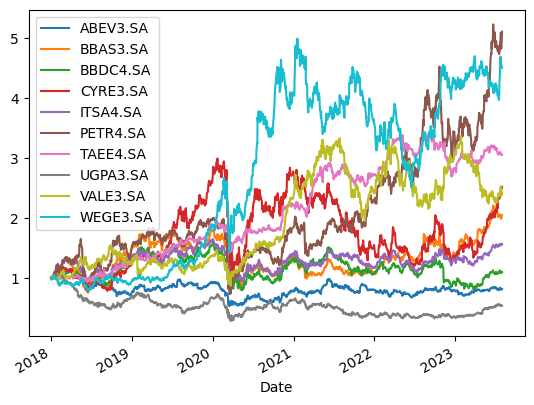

In [ ]:
(carteira/carteira.iloc[0]).plot();

# 2. Retorno diário e o retorno acumulado

In [ ]:
retornos = carteira.pct_change()
retornos

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002305,0.012754,0.004597,0.004505,0.011786,0.009063,0.016176,-0.009874,-0.005992,-0.015188
2018-01-04,-0.005520,0.009595,0.016408,0.008221,0.018817,0.001796,-0.023155,0.011678,0.004099,-0.009740
2018-01-05,0.003700,0.000000,0.005664,0.015567,0.001759,0.005977,0.023704,0.002075,0.015610,0.004098
2018-01-08,-0.001843,0.002376,-0.000281,0.005109,-0.000878,0.011884,0.000000,0.006990,0.022227,0.008163
...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-0.005952,-0.005255,-0.003614,0.037528,0.008147,0.023102,-0.010595,-0.007194,0.030923,-0.025036
2023-07-26,-0.003327,0.008453,0.010278,0.003404,-0.003931,0.000000,-0.001647,-0.018116,-0.003472,-0.000494
2023-07-27,-0.018692,-0.020536,-0.022741,-0.007210,-0.013252,-0.051935,-0.003300,-0.014233,-0.018673,-0.003211


Retorno diário da carteira

In [ ]:
retorno_carteira = (retornos*pesos).sum(axis = 1)
retorno_carteira

Date
2018-01-02    0.000000
2018-01-03    0.003013
2018-01-04    0.003220
2018-01-05    0.007816
2018-01-08    0.005375
                ...   
2023-07-25    0.004205
2023-07-26   -0.000885
2023-07-27   -0.017378
2023-07-28    0.004398
2023-07-31    0.009194
Length: 1384, dtype: float64

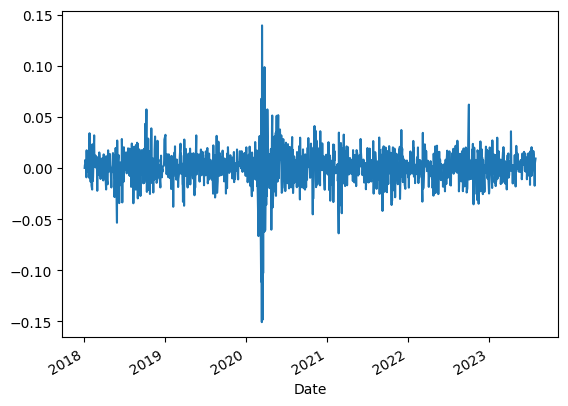

In [ ]:
retorno_carteira.plot();

### Retorno acumulado

In [ ]:
retorno_acumulado_carteira = (1 + retorno_carteira).cumprod() - 1
retorno_acumulado_carteira

Date
2018-01-02    0.000000
2018-01-03    0.003013
2018-01-04    0.006243
2018-01-05    0.014107
2018-01-08    0.019558
                ...   
2023-07-25    1.406735
2023-07-26    1.404605
2023-07-27    1.362817
2023-07-28    1.373209
2023-07-31    1.395027
Length: 1384, dtype: float64

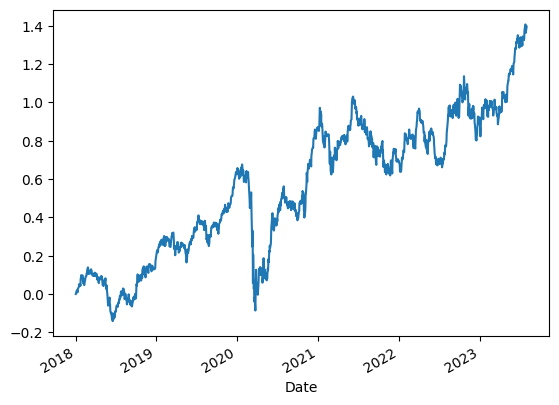

In [ ]:
retorno_acumulado_carteira.plot();

# 3. Comparativo de desempenho

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']
ibov_retorno = ibov.pct_change()
retorno_acumulado_ibov = (1 + ibov_retorno).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


In [ ]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retorno_Carteira'] = retorno_acumulado_carteira
retorno_portfolio['IBOV'] = retorno_acumulado_ibov
retorno_portfolio = retorno_portfolio.dropna()

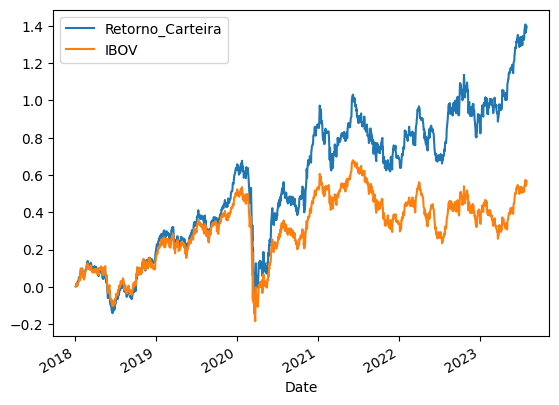

In [ ]:
retorno_portfolio.plot();